In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [37]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df.shape

(303, 14)

In [39]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [41]:
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [42]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [43]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy Score of Random Forest",accuracy_score(y_test, y_pred))

Accuracy Score of Random Forest 0.8524590163934426


In [44]:
gb.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy Score of GradientBoosting",accuracy_score(y_test, y_pred))

Accuracy Score of GradientBoosting 0.8524590163934426


In [45]:
svc.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy Score of SVC",accuracy_score(y_test, y_pred))

Accuracy Score of SVC 0.8524590163934426


In [46]:
lr.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy Score of LogisticRegression",accuracy_score(y_test, y_pred))

Accuracy Score of LogisticRegression 0.8524590163934426


C:\Users\laiba\anaconda3\envs\newenv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
rf = RandomForestClassifier(max_samples = 0.75, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy Score of Random Forest",accuracy_score(y_test, y_pred))

Accuracy Score of Random Forest 0.9016393442622951


In [48]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.8180645161290323)

In [49]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(LogisticRegression(),X,y,cv=10,scoring='accuracy'))

C:\Users\laiba\anaconda3\envs\newenv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\laiba\anaconda3\envs\newenv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

np.float64(0.8283870967741935)

C:\Users\laiba\AppData\Local\Temp\ipykernel_16792\4054111941.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(features)[indices], palette='winter')


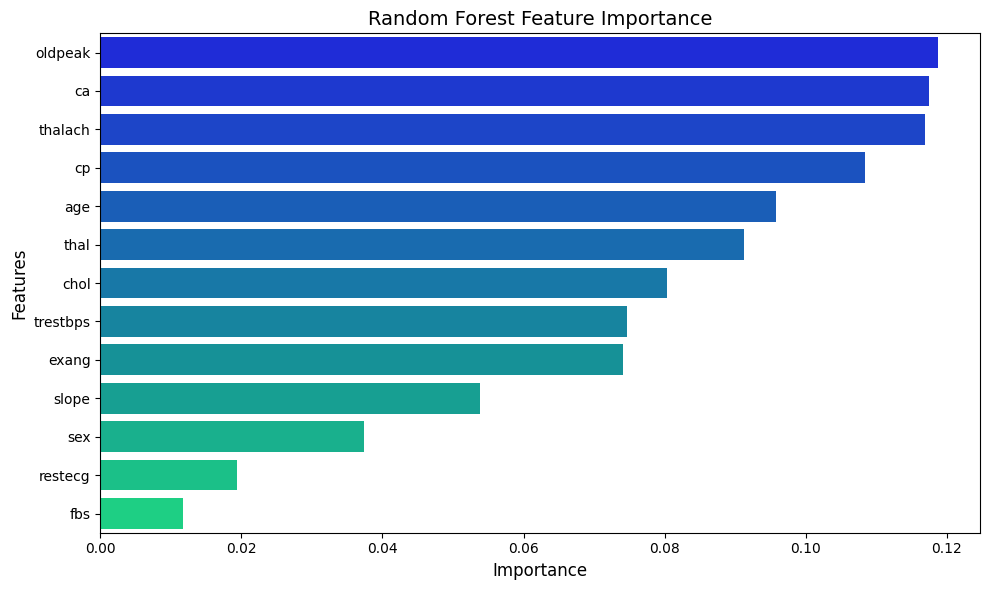

In [50]:
# Feature Importance Plot
importances = rf.feature_importances_
features = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(features)[indices], palette='winter')
plt.title("Random Forest Feature Importance", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


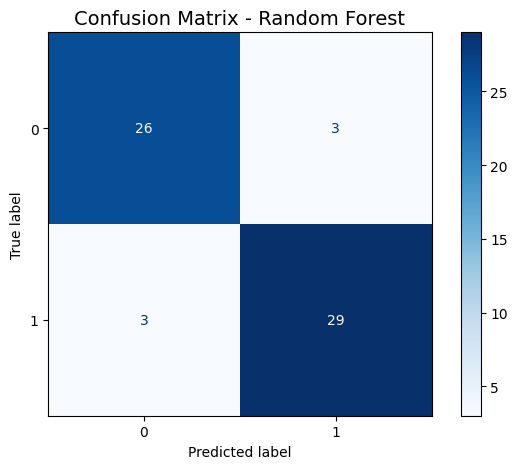

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap= 'Blues')  
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.tight_layout()
plt.show()

